# Code Example of a Neural Network for The Function XOR

Based on the implementation by [Chih-Ling Hsu](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

from net import NeuralNetwork
from net import Plots
from perceptron import Perceptron

## Neural Network Training

First we define network architecture, activation function, input data with labels. The training is called by the method `fit()`.

In [6]:
net_arch = [2, 2, 2, 2, 2, 2, 2, 2, 1]

# Initialize the NeuralNetwork
net = NeuralNetwork(net_arch,
                    act= 'tanh')

# Set the input data
X = np.array([[-1, -1], [-1, 1],
               [1, -1], [1, 1]])


# Set the labels, the correct results for the xor operation
y = np.array([-1, 1, 
              1, -1])

# Call the fit function and train the network for a chosen number of epochs
net.fit(X, 
        y,
        epochs= 10000,
        int_rep= True,
        int_rep_index= -2,
        save_weights= True,
        learning_rate= 0.01)

# Show the prediction results
print("Final prediction")
for s in X:
    print(s, net.predict_single_data(s))

epochs: 10000
Final prediction
[-1 -1] -0.9621407451087527
[-1  1] 0.9610146824647805
[ 1 -1] 0.9583510359953559
[1 1] -0.959281255300966


Decision boundaries:

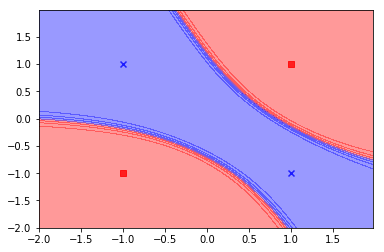

In [7]:
plots = Plots(X, y, net)
plots.decision_regions()

The internal representations and weights during training can be extract to further analysis.

In [8]:
int_rep = net.int_rep_dyn()
weights = net.weights_dyn()

In [10]:
name = 'output/int_rep_tanh_ep10000'

with open(name, 'wb') as f:
    pickle.dump(int_rep, f)

In [2]:
name = 'output/int_rep_tanh_ep10000'

with open(name, 'rb') as f:
    int_rep = pickle.load(f)

In [11]:
name = 'output/weights_tanh_ep10000'

with open(name, 'wb') as f:
    pickle.dump(weights, f)

In [3]:
name = 'output/weights_tanh'

with open(name, 'rb') as f:
    weights = pickle.load(f)

### Linear separability over layers: perceptron

Note that the perceptron works with $\{ 0, 1\}$ inputs instead of $\{ -1, + 1 \}$.

In [ ]:
layer = []
epoch = []
linear_sep_ = []

y = np.array([-1, 1, 
              1, -1])

y_p = ((y + 1)/2).astype(int)

for j in range(1, len(int_rep), 10):
       
    t0 = time.time()
    
    print('Epoch %d' % j)

    for k in range(len(int_rep[1]) - 1 ):
        
        #t0_l = time.time()
        
        int_p = (int_rep[j][k] + 1.)/2.
        
        linear_sep = Perceptron(int_p, y_p).train()
        
        linear_sep_.append(linear_sep)
        
        layer.append(k)
        epoch.append(j)
        
        #t1_l = time.time()
        #deltaT = t1_l - t0_l
        #print('layer %d time %.2f s' % (k, deltaT ) )
        
    t1 = time.time()
    deltaT = t1 - t0
    
    print('time elapsed epoch %.2f s' % deltaT)
    
    #if (j % 100000 == 0):
    #    name = '../../../output/linear_sep_ep%d' % j
    #    with open(name, 'wb') as f:
    #        pickle.dump(linear_sep_, f)

Epoch 1
time elapsed epoch 2.89 s
Epoch 11
time elapsed epoch 2.89 s
Epoch 21
time elapsed epoch 3.07 s
Epoch 31
time elapsed epoch 3.07 s
Epoch 41
time elapsed epoch 2.87 s
Epoch 51
time elapsed epoch 2.77 s
Epoch 61
time elapsed epoch 2.73 s
Epoch 71
time elapsed epoch 2.83 s
Epoch 81
time elapsed epoch 3.07 s
Epoch 91
time elapsed epoch 3.04 s
Epoch 101
time elapsed epoch 2.92 s
Epoch 111
time elapsed epoch 3.02 s
Epoch 121
time elapsed epoch 3.06 s
Epoch 131
time elapsed epoch 3.10 s
Epoch 141
time elapsed epoch 2.93 s
Epoch 151
time elapsed epoch 2.86 s
Epoch 161
time elapsed epoch 2.75 s
Epoch 171
time elapsed epoch 2.96 s
Epoch 181
time elapsed epoch 3.12 s
Epoch 191
time elapsed epoch 3.00 s
Epoch 201
time elapsed epoch 3.04 s
Epoch 211
time elapsed epoch 3.08 s
Epoch 221
time elapsed epoch 3.11 s
Epoch 231
time elapsed epoch 3.05 s
Epoch 241
time elapsed epoch 3.08 s
Epoch 251
time elapsed epoch 3.11 s
Epoch 261
time elapsed epoch 3.06 s
Epoch 271
time elapsed epoch 3.00 s
Epo

time elapsed epoch 2.75 s
Epoch 2261
time elapsed epoch 1.99 s
Epoch 2271
time elapsed epoch 2.71 s
Epoch 2281
time elapsed epoch 2.38 s
Epoch 2291
time elapsed epoch 1.85 s
Epoch 2301
time elapsed epoch 1.93 s
Epoch 2311
time elapsed epoch 2.33 s
Epoch 2321
time elapsed epoch 2.10 s
Epoch 2331
time elapsed epoch 2.32 s
Epoch 2341
time elapsed epoch 2.17 s
Epoch 2351
time elapsed epoch 1.71 s
Epoch 2361
time elapsed epoch 2.02 s
Epoch 2371
time elapsed epoch 1.57 s
Epoch 2381
time elapsed epoch 1.81 s
Epoch 2391
time elapsed epoch 1.44 s
Epoch 2401
time elapsed epoch 1.60 s
Epoch 2411
time elapsed epoch 1.20 s
Epoch 2421
time elapsed epoch 1.32 s
Epoch 2431
time elapsed epoch 1.46 s
Epoch 2441
time elapsed epoch 1.23 s
Epoch 2451
time elapsed epoch 1.42 s
Epoch 2461
time elapsed epoch 1.26 s
Epoch 2471
time elapsed epoch 1.27 s
Epoch 2481
time elapsed epoch 1.16 s
Epoch 2491
time elapsed epoch 1.07 s
Epoch 2501
time elapsed epoch 1.12 s
Epoch 2511
time elapsed epoch 1.04 s
Epoch 2521
t

In [ ]:
name = 'output/lin_sep_tanh_ep_10000_step10'

with open(name, 'wb') as f:
    pickle.dump(linear_sep_, f)

In [ ]:
linear_sep_

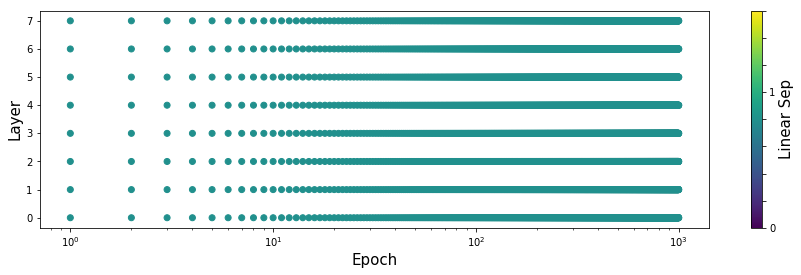

In [24]:
#slicing = 100
slicing = len(epoch)

f = plt.figure(figsize=(15,4))

scatters = plt.scatter(epoch[0:slicing], layer[0:slicing], c= linear_sep_[0:slicing])
cbar = plt.colorbar(scatters)
cbar.ax.set_yticklabels(['0', '', '', '', '', '1'])
cbar.set_label('Linear Sep', fontsize= 15, rotation= 90)
plt.ylabel('Layer', fontsize= 15)
plt.xlabel('Epoch', fontsize= 15)
plt.xscale('log')
plt.show()

In [ ]:
slicing = 100
#slicing = len(epoch)

f = plt.figure(figsize=(15,4))

scatters = plt.scatter(epoch[0:slicing], layer[0:slicing], c= linear_sep__[0:slicing])
cbar = plt.colorbar(scatters)
cbar.ax.set_yticklabels(['0', '', '', '', '', '1'])
cbar.set_label('Linear Sep', fontsize= 15, rotation= 90)
plt.ylabel('Layer', fontsize= 15)
plt.xlabel('Epoch', fontsize= 15)
plt.xscale('log')
plt.show()

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 
                                       sharex=True,
                                       sharey=True,
                                       figsize=(10,15))
ax1.plot(l_minus_minus_x, marker='.', label= '$x_0$ = %d' % l_minus_minus_x[0])
ax1.plot(l_minus_minus_y, marker='.', label= '$y_0$ = %d' % l_minus_minus_y[0])
ax1.legend(fontsize= 12)
ax2.plot(l_minus_plus_x, marker='.', label= '$x_0$ = %d' % l_minus_plus_x[0])
ax2.plot(l_minus_plus_y, marker='.', label= '$y_0$ = %d' % l_minus_plus_y[0])
ax2.legend(fontsize= 12)
ax3.plot(l_plus_minus_x, marker='.', label= '$x_0$ = %d' % l_plus_minus_x[0])
ax3.plot(l_plus_minus_y, marker='.', label= '$y_0$ = %d' % l_plus_minus_y[0])
ax3.legend(fontsize= 12)
ax4.plot(l_plus_plus_x, marker='.', label= '$x_0$ = %d' % l_plus_plus_x[0])
ax4.plot(l_plus_plus_y, marker='.', label= '$y_0$ = %d' % l_plus_plus_y[0])
ax4.legend(fontsize= 12)
ax4.set_xlabel('Epochs', fontsize= 15)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
#plt.xlim(-10, 1000)
#plt.legend()
plt.show()

## Information processing

In [ ]:
nn_trained = NeuralNetwork(net_arch,
                           act= 'tanh',
                           W= weights[-1])

In [ ]:
x_dynamics = nn_trained.forward(X)

In [ ]:
x_dynamics[-1]

In [ ]:
l_minus_minus_x = []
l_minus_minus_y = []
l_minus_plus_x = []
l_minus_plus_y = []
l_plus_minus_x = []
l_plus_minus_y = []
l_plus_plus_x = []
l_plus_plus_y = []


for j in range(len(x_dynamics) - 1):
    
    l_minus_minus_x.append(x_dynamics[j][0][0])
    l_minus_minus_y.append(x_dynamics[j][0][1])
    l_minus_plus_x.append(x_dynamics[j][1][0])
    l_minus_plus_y.append(x_dynamics[j][1][1])
    l_plus_minus_x.append(x_dynamics[j][2][0])
    l_plus_minus_y.append(x_dynamics[j][2][1])
    l_plus_plus_x.append(x_dynamics[j][3][0])
    l_plus_plus_y.append(x_dynamics[j][3][1])

In [ ]:
plot_dynamics(l_minus_minus_x, l_minus_minus_y,
              l_minus_plus_x, l_minus_plus_y,
              l_plus_minus_x, l_plus_minus_y,
              l_plus_plus_x, l_plus_plus_y,
              training= False)

In [ ]:
for j in range(len(l_minus_minus_x)):
    
    ints = closed_segment_intersect([l_minus_minus_x[j], l_minus_minus_y[j]], 
                                    [l_plus_plus_x[j], l_plus_plus_y[j]],
                                    [l_minus_plus_x[j], l_minus_plus_y[j]], 
                                    [l_plus_minus_x[j], l_plus_minus_y[j]])
    
    sep = bool(abs(int(ints) - 1 ))
    
    print('Layer = %d' %j, 'Sep = %s' %sep)

In [ ]:
def plot_dynamics(l_minus_minus_x, l_minus_minus_y,
                  l_minus_plus_x, l_minus_plus_y,
                  l_plus_minus_x, l_plus_minus_y,
                  l_plus_plus_x, l_plus_plus_y, 
                  training= False):
    
    if training:
        title = 'Training dynamics'
    else:
        title = 'Layer dynamics'
    
    
    xq = np.array(l_minus_minus_x)
    yq = np.array(l_minus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'b', 
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'b')

    ###############################

    xq = np.array(l_minus_plus_x)
    yq = np.array(l_minus_plus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'r',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'r')

    ###############################

    xq = np.array(l_plus_minus_x)
    yq = np.array(l_plus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'g',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'g')

    ###############################

    xq = np.array(l_plus_plus_x)
    yq = np.array(l_plus_plus_y)
    
    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'm',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'm')

    plt.grid()
    plt.title(title, fontsize= 20)
    plt.show()
    
    